In [1]:
import pandas as pd

# Carga del dataset con las columnas seleccionadas
archivo = 'ensadul2021Selcol.csv'
data = pd.read_csv(archivo, delimiter=';')

# mostrando los primeros renglones del dataset
data.head()

,Folio,Folio de integrante,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,¿Qué edad tenía cuando le diagnosticaron obesidad?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,...,A1515 ¿Con qué frecuencia se siente excluido?,A1516 ¿Con qué frecuencia se siente aislado de los demás?,Estrato urbanidad/ruralidad,Region,INT_H0317A ¿Cuál es el último año o grado que aprobó (USTED/NOMBRE) en la escuela? NIVEL,INT_H0903 ¿USTED/NOMBRE realizaba algún deporte o actividad física antes de la pandemia por COVID-19?,"INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…",ALTURA_NUM,PESO_NUM,IMC
0,2021_01001019,2021_01001019_02,Centro_Norte,01 AGUASCALIENTES,42,Mujer,,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,Todo el tiempo o la mayoría del tiempo (5-7...,...,,,Metropolitano (100mil y + Hab),Resto Centro Norte,Licenciatura o profesional,No,fue igual?,160.2,64,24.937617
1,2021_01001019,2021_01001019_03,Centro_Norte,01 AGUASCALIENTES,21,Hombre,,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,Pocas veces o alguna vez (1-2 días).,...,,,Metropolitano (100mil y + Hab),Resto Centro Norte,Licenciatura o profesional,No,fue igual?,171.5,70,23.799607
2,2021_01001021,2021_01001021_02,Centro_Norte,01 AGUASCALIENTES,48,Hombre,,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,...,,,Metropolitano (100mil y + Hab),Resto Centro Norte,Licenciatura o profesional,Sí,disminuyó?,164.3,78,28.894786
3,2021_01001031,2021_01001031_04,Centro_Norte,01 AGUASCALIENTES,24,Mujer,,Pocas veces o alguna vez (1-2 días).,Pocas veces o alguna vez (1-2 días).,Pocas veces o alguna vez (1-2 días).,...,,,Metropolitano (100mil y + Hab),Resto Centro Norte,Licenciatura o profesional,No,disminuyó?,159.7,72,28.230766
4,2021_01001105,2021_01001105_03,Centro_Norte,01 AGUASCALIENTES,42,Mujer,,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,...,,,Metropolitano (100mil y + Hab),Resto Centro Norte,Preparatoria o Bachillerato,No,disminuyó?,163.0,92,34.626821


In [2]:
# resumen de la información
data_info = {
    "Head": data.head(),
    "Missing Values": data.isnull().sum(),
    "Data Types": data.dtypes,
    "Unique Values": data.nunique()
}

data_info

{'Head':            Folio Folio de integrante Region o zona de trabajo  \
 0  2021_01001019    2021_01001019_02             Centro_Norte   
 1  2021_01001019    2021_01001019_03             Centro_Norte   
 2  2021_01001021    2021_01001021_02             Centro_Norte   
 3  2021_01001031    2021_01001031_04             Centro_Norte   
 4  2021_01001105    2021_01001105_03             Centro_Norte   
 
             DESC_ENT  Edad del Seleccionado  \
 0  01 AGUASCALIENTES                     42   
 1  01 AGUASCALIENTES                     21   
 2  01 AGUASCALIENTES                     48   
 3  01 AGUASCALIENTES                     24   
 4  01 AGUASCALIENTES                     42   
 
   ASEXO ¿Cuál es el sexo de (NOMBRE) ?  \
 0                                Mujer   
 1                               Hombre   
 2                               Hombre   
 3                                Mujer   
 4                                Mujer   
 
   ¿Qué edad tenía cuando le diagnosticaron 

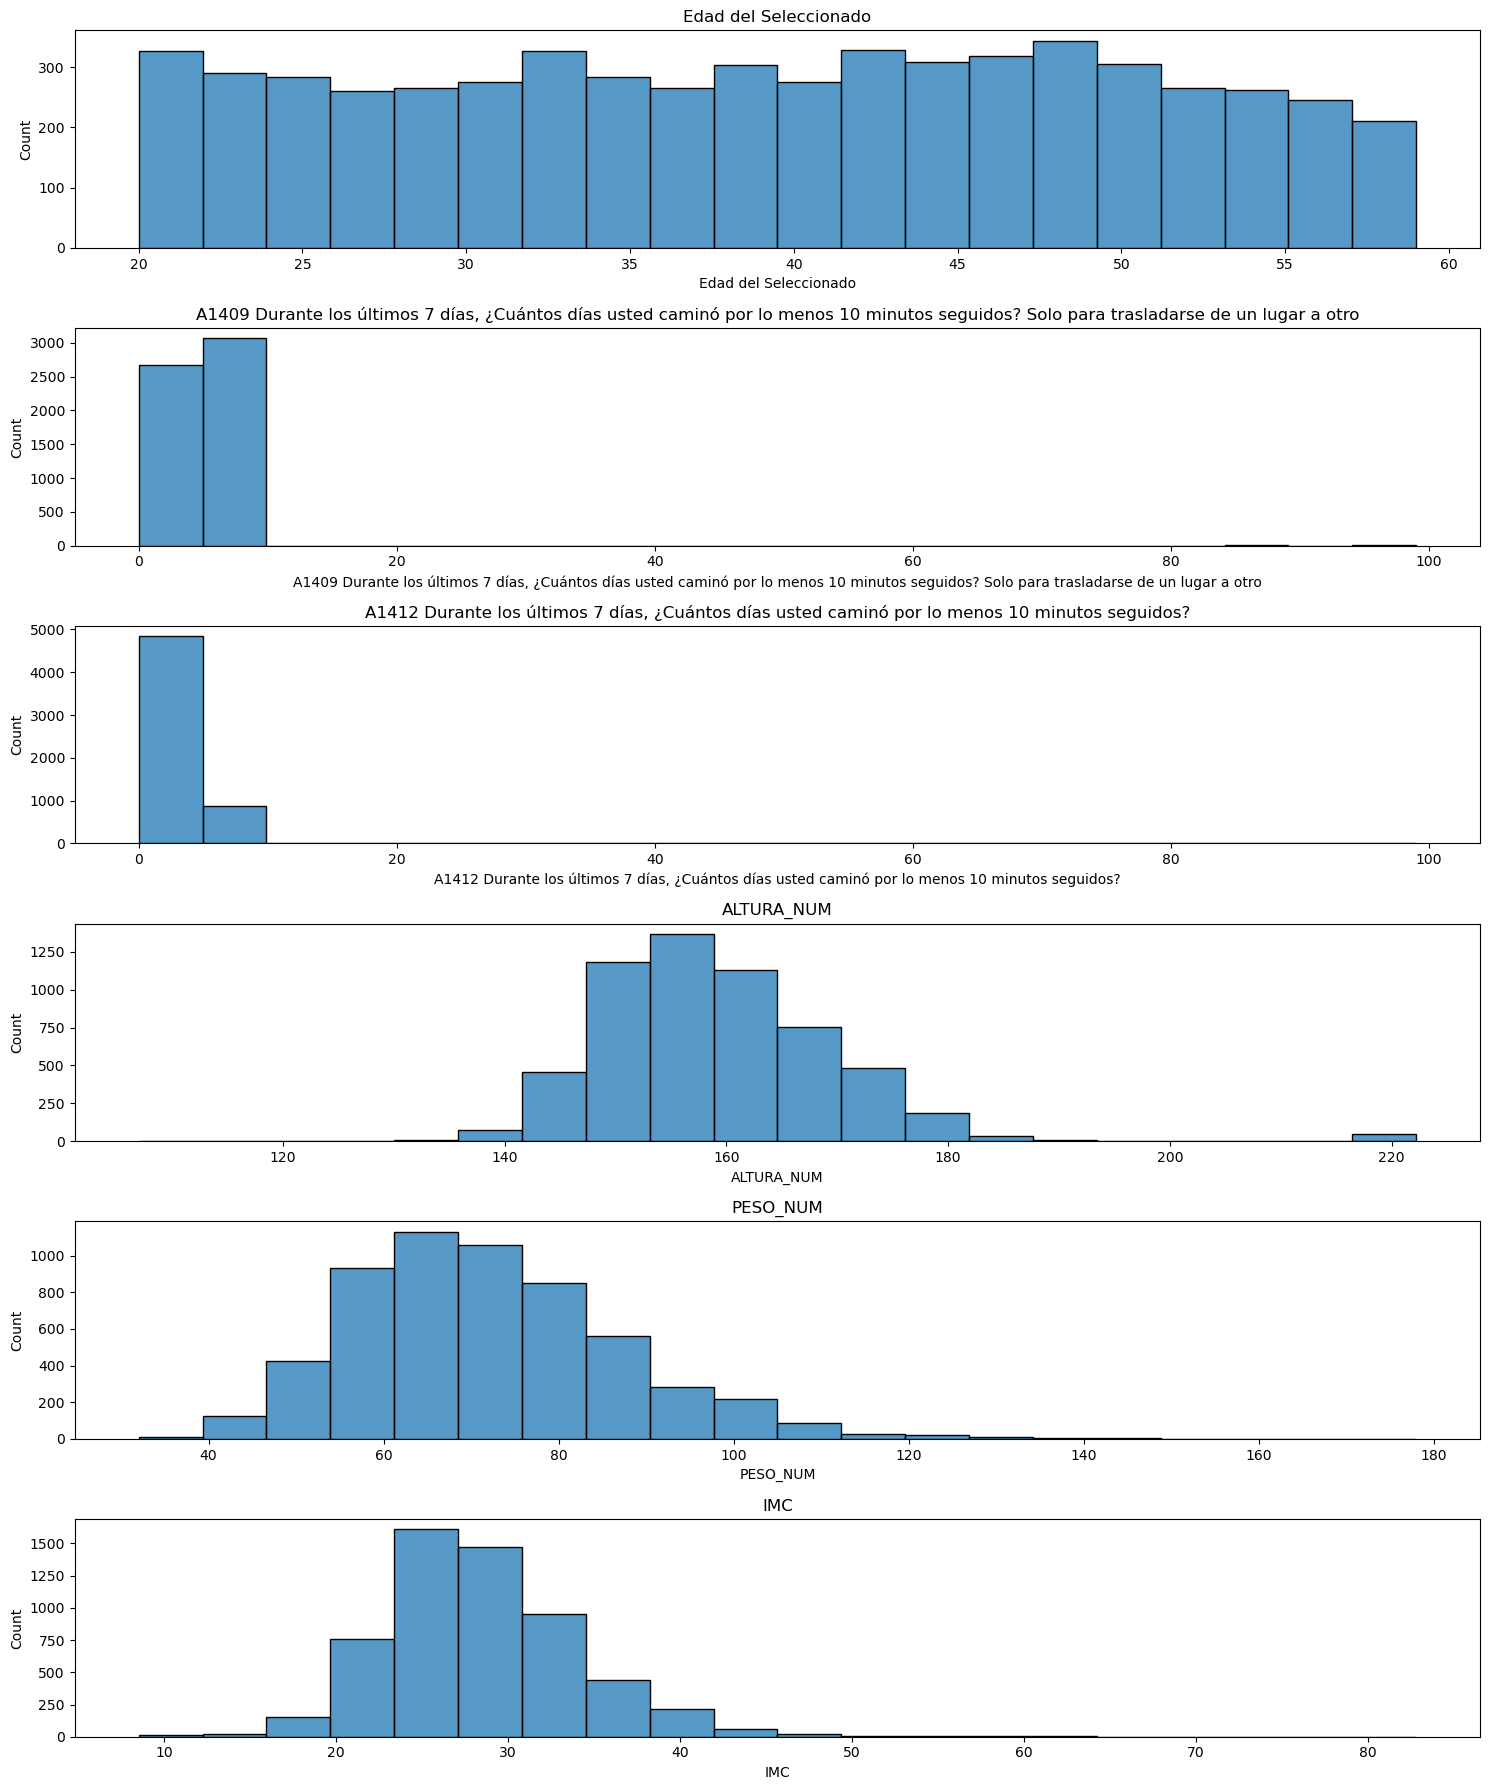

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de los atributos numéricos
numerical_data = data.select_dtypes(include=['float64', 'int64'])

num_columns = len(numerical_data.columns)

# Graficando histogramas de datos numéricos
plt.figure(figsize=(15, num_columns * 3))
for i, col in enumerate(numerical_data.columns):
    plt.subplot(num_columns, 1, i + 1)
    sns.histplot(numerical_data[col], kde=False, bins=20)
    plt.title(col)
    plt.tight_layout()

# Desplegando los histogramas
plt.show()


In [4]:

# Validando el número de valores unicos para los datos categóricos
categorical_data = data.select_dtypes(include=['object'])
categorical_unique_counts = categorical_data.nunique()

categorical_unique_counts

Folio                                                                                                                                                                                4959
Folio de integrante                                                                                                                                                                  5745
Region o zona de trabajo                                                                                                                                                                9
DESC_ENT                                                                                                                                                                               33
ASEXO ¿Cuál es el sexo de (NOMBRE) ?                                                                                                                                                    2
¿Qué edad tenía cuando le diagnosticaron obesidad?                    

In [5]:
# remplazando valores que tienen espacio " " con NaN (null)
data.replace(" ", pd.NA, inplace=True)

In [6]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
data.to_csv('temp0.csv',sep=';', index=False)

In [7]:
# Identificación de columnas con valores iniciales de "sí" o "no" (en varias formas)
variaciones_si_no = ['SI', 'SÍ', 'Sí', 'si', 'sí', 'No', 'no']
columnas_si_no = []
data = data.fillna('')
        
for column in data.columns:
    if data[column].astype(str).str[:2].str.upper().isin(variaciones_si_no).any():
        columnas_si_no.append(column)

# Truncamiento de los valores a los dos primeros caracteres y estandarización a "SI" y "NO"
for column in columnas_si_no:
    data[column] = data[column].astype(str).str[:2].str.upper().replace({'SÍ': 'SI'})


# Visualización de las primeras filas del conjunto de datos para verificar los cambios
print(data[columnas_si_no].head())


  ¿Algún médico le ha dicho que tiene diabetes (o alta el azúcar en la sangre)?  \
0                                                 NO                              
1                                                 NO                              
2                                                 NO                              
3                                                 NO                              
4                                                 NO                              

  ¿Algún médico le ha dicho que tiene la presión alta?  \
0                                                 NO     
1                                                 NO     
2                                                 NO     
3                                                 NO     
4                                                 NO     

  ¿Le ha dicho el médico que usted tiene (o tuvo) un infarto o ataque al corazón?  \
0                                                                  

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identificando las columnas con respuestas "SÍ.", "SI." y "NO.", incluyendo aquellas con valores adicionales
columnas_si_no_extendido = [col for col in data.columns 
                        if ('NO' in data[col].unique()) or ('SI' in data[col].unique()) or ('SI.' in data[col].unique()) or ('No' in data[col].unique()) or ('Sí' in data[col].unique())]

# Actualizando el pipeline para estas características
si_no_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NO')),
    ('onehot', OneHotEncoder())
])

# Actualizando el ColumnTransformer para incluir el nuevo pipeline de características extendidas
preproceso = ColumnTransformer(
    transformers=[
        ('si_no_transformacion', si_no_pipeline, columnas_si_no_extendido)
    ]
)

# Aplicando las transformaciones a las columnas relevantes
si_no_transformed = preproceso.fit_transform(data)

# Mostrando las columnas identificadas y el tamaño de los datos transformados
columnas_si_no_extendido, si_no_transformed.shape


C:\Users\Marco Silva\AppData\Local\Temp\ipykernel_328\719423286.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ('NO' in data[col].unique()) or ('SI' in data[col].unique()) or ('SI.' in data[col].unique()) or ('No' in data[col].unique()) or ('Sí' in data[col].unique())]


(['¿Algún médico le ha dicho que tiene diabetes (o alta el azúcar en la sangre)?',
  '¿Algún médico le ha dicho que tiene la presión alta?',
  '¿Le ha dicho el médico que usted tiene (o tuvo) un infarto o ataque al corazón?',
  '¿Algún médico le ha dicho que tiene el colesterol alto?',
  '¿Algún médico le ha dicho que tiene los triglicéridos  altos?',
  '¿Su PADRE tiene o tuvo diabetes o azúcar alta en la sangre?',
  '¿Su PADRE tiene o tuvo hipertensión o presión alta?',
  '¿Su PADRE tuvo valores altos de colesterol y/o triglicéridos?',
  '¿Su MADRE tiene o tuvo diabetes o azúcar alta en la sangre?',
  '¿Su MADRE tiene o tuvo hipertensión o presión alta?',
  '¿Su MADRE tuvo valores altos de colesterol y/o triglicéridos?',
  'A1001I i) detección de colesterol o triglicéridos altos (examen de sangre)?',
  'A1211 ¿Alguna vez ha pensado en suicidarse?',
  'A1414 Entonces, ¿el tiempo que paso usted caminando, solo por recreación, deporte, ejercicio o placer,  durante los últimos ____ días e

In [9]:
# Guardando el dataset con nuevos encabezados en un archivo temporal CSV
data.to_csv('temp2.csv',sep=';', index=False)

In [10]:

# Asumimos que 'preproceso' ya tiene el 'OneHotEncoder' ajustado
column_names = preproceso.named_transformers_['si_no_transformacion']['onehot'].get_feature_names_out(columnas_si_no_extendido)

# Convierte los datos transformados a DataFrame
si_no_transformed_df = pd.DataFrame(
    si_no_transformed,
    columns=column_names
)

# Elimina las columnas originales del dataset
data_dropped = data.drop(columns=columnas_si_no_extendido)

# Concatena el nuevo DataFrame con los datos ya codificados en onehot
data_final = pd.concat([data_dropped, si_no_transformed_df], axis=1)



In [11]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
data_final.to_csv('temp3.csv',sep=';', index=False)

In [12]:
import numpy as np

# Creando un mapeo basado en la imagen proporcionada para la columna 'Region o zona de trabajo'
region_mapping = {
    'Pacifico_Norte': 1,
    'Frontera': 2,
    'Pacifico_Centro': 3,
    'Centro_Norte': 4,
    'Centro': 5,
    'Cd México': 6,
    'EdoMéxico': 7,
    'Pácifico_Sur': 8,
    'Península': 9
}

# Aplicando el mapeo al conjunto de datos
data_final['Region o zona de trabajo'] = data_final['Region o zona de trabajo'].map(region_mapping)

# Revisando si hay valores nulos después del mapeo
nulos_region = data_final['Region o zona de trabajo'].isnull().sum()

# Mostrando los valores únicos y los valores nulos
data_final['Region o zona de trabajo'].unique(), nulos_region


(array([4, 1, 9, 2, 3, 6, 8, 5, 7], dtype=int64), 0)

In [13]:
# Extrayendo los primeros dos caracteres del campo 'DESC_ENT' y convirtiéndolos en enteros
data_final['DESC_ENT'] = data_final['DESC_ENT'].str[:2].astype(int)

# Mostrando los valores únicos para verificar la transformación
data_final['DESC_ENT'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [14]:
# Creando un mapeo para los campos basado en las reglas proporcionadas
sentimientos_mapping = {
    'Rara vez o nunca (menos de un día).': 1,
    'Pocas veces o alguna vez (1-2 días).': 2,
    'Un número de veces considerable (3-4 dias).': 3,
    'Todo el tiempo o la mayoría del tiempo (5-7 días).': 4
}

# Campos a transformar
campos_sentimientos = [
    "Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?",
    "Durante la última semana...¿se sintió deprimido/a?",
    "Durante la última semana...¿no durmió bien?"
]

# Aplicando el mapeo a los campos relevantes
for campo in campos_sentimientos:
    data_final[campo] = data_final[campo].map(sentimientos_mapping)

# Verificando la transformación
data_final[campos_sentimientos].head()


,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?
0,1.0,1.0,NaN
1,1.0,1.0,2.0
2,1.0,1.0,1.0
3,2.0,2.0,2.0
4,1.0,1.0,1.0


In [15]:
# Creando un mapeo para el campo 'ASEXO ¿Cuál es el sexo de (NOMBRE) ?' según las reglas proporcionadas
sexo_mapping = {
    'Hombre': 1,
    'Mujer': 2
}

# Aplicando el mapeo al campo relevante
data_final['ASEXO ¿Cuál es el sexo de (NOMBRE) ?'] = data_final['ASEXO ¿Cuál es el sexo de (NOMBRE) ?'].map(sexo_mapping)

# Verificando la transformación
data_final['ASEXO ¿Cuál es el sexo de (NOMBRE) ?'].head()


0    2
1    1
2    1
3    2
4    2
Name: ASEXO ¿Cuál es el sexo de (NOMBRE) ?, dtype: int64

In [16]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
data_final.to_csv('temp3.csv',sep=';', index=False)

In [17]:
# Limpiando columnas identificadas con No responde o no sabe

# Atributos sobre los que se va a actuar
columnas_a_limpiar= ['A1005F ¿Qué diagnóstico le dieron?', 'A1005G ¿Qué diagnóstico le dieron?',
                      'A1005H ¿Qué diagnóstico le dieron?', 'A1005I ¿Qué diagnóstico le dieron?']

# Remplaza "No responde" y "No sabe" con NaN (null)
for column in columnas_a_limpiar:
    data_final[column] = data_final[column].replace(['No responde', 'No sabe',' '], [None, None, None])

data_final[columnas_a_limpiar].head()

,A1005F ¿Qué diagnóstico le dieron?,A1005G ¿Qué diagnóstico le dieron?,A1005H ¿Qué diagnóstico le dieron?,A1005I ¿Qué diagnóstico le dieron?
0,,,,
1,,,,
2,,,,
3,,,,
4,,Bien o Negativo,,


In [18]:
# Codificando las columnas limpiadas mediante onehot

# Usando get_dummies para codificar los valoes en onehot
columnas_codificadas_onehot = pd.get_dummies(data_final[columnas_a_limpiar])

# Borramos las columnas originales del dataset
data_final = data_final.drop(columns=columnas_a_limpiar)

# creamos un nuevo dataset con las columnas codificadas en onehot
data_onehot = pd.concat([data_final, columnas_codificadas_onehot], axis=1)

# Display the first few rows of the updated dataset to verify the changes
data_onehot.head()


,Folio,Folio de integrante,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,¿Qué edad tenía cuando le diagnosticaron obesidad?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,...,A1005F ¿Qué diagnóstico le dieron?_Positivo,A1005G ¿Qué diagnóstico le dieron?_,A1005G ¿Qué diagnóstico le dieron?_Bien o Negativo,A1005G ¿Qué diagnóstico le dieron?_Positivo,A1005H ¿Qué diagnóstico le dieron?_,A1005H ¿Qué diagnóstico le dieron?_Bien o Negativo,A1005H ¿Qué diagnóstico le dieron?_Positivo,A1005I ¿Qué diagnóstico le dieron?_,A1005I ¿Qué diagnóstico le dieron?_Bien o Negativo,A1005I ¿Qué diagnóstico le dieron?_Positivo
0,2021_01001019,2021_01001019_02,4,1,42,2,,1.0,1.0,NaN,...,0,1,0,0,1,0,0,1,0,0
1,2021_01001019,2021_01001019_03,4,1,21,1,,1.0,1.0,2.0,...,0,1,0,0,1,0,0,1,0,0
2,2021_01001021,2021_01001021_02,4,1,48,1,,1.0,1.0,1.0,...,0,1,0,0,1,0,0,1,0,0
3,2021_01001031,2021_01001031_04,4,1,24,2,,2.0,2.0,2.0,...,0,1,0,0,1,0,0,1,0,0
4,2021_01001105,2021_01001105_03,4,1,42,2,,1.0,1.0,1.0,...,0,0,1,0,1,0,0,1,0,0


In [19]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
data_onehot.to_csv('temp4.csv',sep=';', index=False)

In [20]:
# Creando un mapeo para los campos basado en las reglas proporcionadas
dificultad_mapping = {
    'Ninguna dificultad':1,
    'Cierta dificultad':2,
    'Mucha dificultad':3,
    'Le resulta imposible caminar o subir escalones':4
}

# Campos a transformar
campos_dificultad = [
    "A1405 ¿Tiene dificultad para caminar o subir escalones?",
    "A1407 ¿Tiene dificultad para el cuidado propio, tal como lavarse todo el cuerpo o vestirse?",
    "A1408 Usando su idioma habitual, ¿tiene dificultad para comunicarse, por ejemplo, entender a otros o hacerse entender?"
]

# Aplicando el mapeo a los campos relevantes
for campo in campos_dificultad:
    data_onehot[campo] = data_onehot[campo].map(dificultad_mapping)

# Verificando la transformación
data_onehot[campos_dificultad].head()

,A1405 ¿Tiene dificultad para caminar o subir escalones?,"A1407 ¿Tiene dificultad para el cuidado propio, tal como lavarse todo el cuerpo o vestirse?","A1408 Usando su idioma habitual, ¿tiene dificultad para comunicarse, por ejemplo, entender a otros o hacerse entender?"
0,1,1.0,1
1,2,2.0,1
2,1,1.0,1
3,1,1.0,1
4,1,1.0,1


In [21]:
# Creando un mapeo para los campos basado en las reglas proporcionadas
frecuencia_mapping = {
    'Casi nunca (o nunca)':1,
    'Algunas veces':2,
    'Frecuentemente':3
}

# Campos a transformar
campos_frecuencia = [
    "A1514 ¿Con qué frecuencia siente que le falta compañía?",
    "A1515 ¿Con qué frecuencia se siente excluido?",
    "A1516 ¿Con qué frecuencia se siente aislado de los demás?"

]

# Aplicando el mapeo a los campos relevantes
for campo in campos_frecuencia:
    data_onehot[campo] = data_onehot[campo].map(frecuencia_mapping)

# Verificando la transformación
data_onehot[campos_frecuencia].head()

,A1514 ¿Con qué frecuencia siente que le falta compañía?,A1515 ¿Con qué frecuencia se siente excluido?,A1516 ¿Con qué frecuencia se siente aislado de los demás?
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [22]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
data_onehot.to_csv('temp5.csv',sep=';', index=False)

In [23]:

# Validando el numero de valores unicos para los datos categóricos
categorical_data2 = data_onehot.select_dtypes(include=['object'])
categorical_unique_counts2 = categorical_data2.nunique()

categorical_unique_counts2

Folio                                                                                                                                                     4959
Folio de integrante                                                                                                                                       5745
¿Qué edad tenía cuando le diagnosticaron obesidad?                                                                                                          63
A1005I ¿Qué diagnóstico le dieron?.1                                                                                                                         3
A1301 Actualmente, ¿fuma tabaco…                                                                                                                             4
A1308 En los últimos 12 meses,¿Con qué frecuencia tomó al menos una copa ya sea de vino, cerveza, whisky o cualquier otra bebida que contenga alcohol?       7
A1507 ¿A cuántos de sus familiares siente lo s

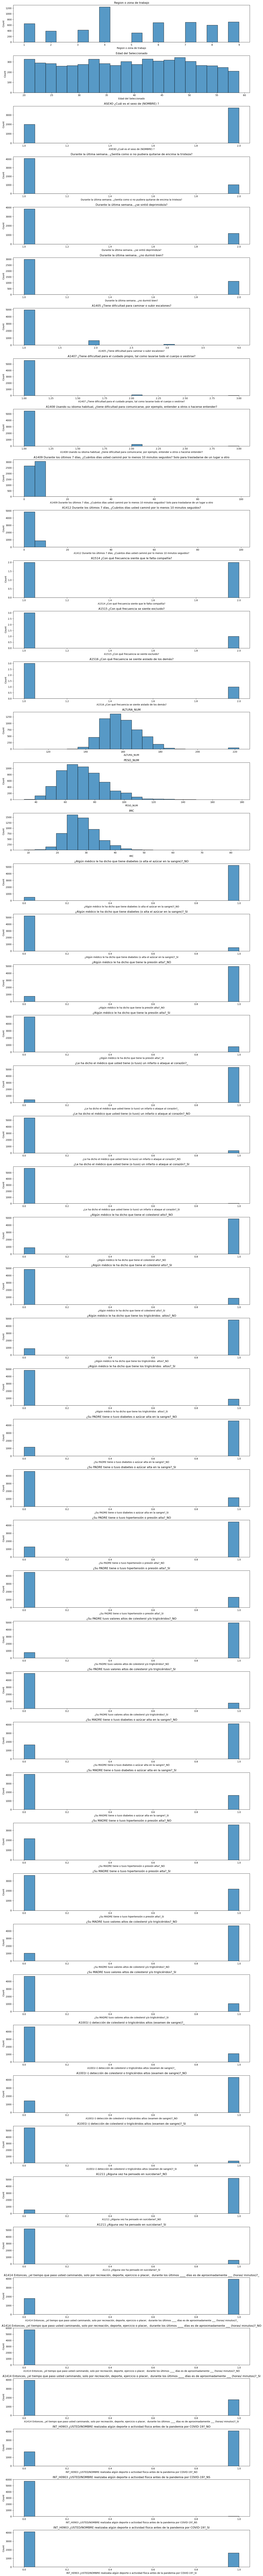

In [24]:
# Distribución de los atributos numéricos
numerical_data2 = data_onehot.select_dtypes(include=['float64', 'int64'])

num_columns2 = len(numerical_data2.columns)

# Graficando histogramas de datos numéricos
plt.figure(figsize=(15, num_columns2 * 3))
for i, col in enumerate(numerical_data2.columns):
    plt.subplot(num_columns2, 1, i + 1)
    sns.histplot(numerical_data2[col], kde=False, bins=20)
    plt.title(col)
    plt.tight_layout()

# Desplegando los histogramas
plt.show()


In [25]:
#Borramos columna duplicada

data_onehot = data_onehot.drop(columns='A1005I ¿Qué diagnóstico le dieron?.1')



In [26]:
# Creando un mapeo para los campos basado en las reglas proporcionadas
amigos_mapping = {
    'Ninguno':1,
    '1':2,
    '2':3,
    '3 ó 4':4,
    '5 a 8':5,
    '9 ó más':6
}

# Campos a transformar
campos_amigos = [
    "A1507 ¿A cuántos de sus familiares siente lo suficientemente cercanos como para llamarlos cuando necesita ayuda?",
    "A1510 A cuántos de sus amigos siente lo suficientemente cercanos como para llamarlos cuando necesita ayuda?"
]

# Aplicando el mapeo a los campos relevantes
for campo in campos_amigos:
    data_onehot[campo] = data_onehot[campo].map(amigos_mapping)

# Verificando la transformación
data_onehot[campos_amigos].head()

,A1507 ¿A cuántos de sus familiares siente lo suficientemente cercanos como para llamarlos cuando necesita ayuda?,A1510 A cuántos de sus amigos siente lo suficientemente cercanos como para llamarlos cuando necesita ayuda?
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [27]:
# Creando un mapeo para los campos basado en las reglas proporcionadas
escuela_mapping = {
    'Preescolar':1,
    'Primaria':2,
    'Secundaria':3,
    'Preparatoria o Bachillerato':4,
    'Normal básica':5,
    'Estudios técnicos o comerciales con primaria terminada':6,
    'Estudios técnicos o comerciales con secundaria terminada':7,
    'Estudios técnicos o comerciales con preparatoria terminada':8,
    'Normal de licenciatura':9,
    'Licenciatura o profesional':10,
    'Maestría':11,
    'Doctorado':12
}

# Campos a transformar
campos_escuela = [
    "INT_H0317A ¿Cuál es el último año o grado que aprobó (USTED/NOMBRE) en la escuela? NIVEL"
]

# Aplicando el mapeo a los campos relevantes
for campo in campos_escuela:
    data_onehot[campo] = data_onehot[campo].map(escuela_mapping)

# Verificando la transformación
data_onehot[campos_escuela].head()







,INT_H0317A ¿Cuál es el último año o grado que aprobó (USTED/NOMBRE) en la escuela? NIVEL
0,10.0
1,10.0
2,10.0
3,10.0
4,4.0


In [28]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
data_onehot.to_csv('temp6.csv',sep=';', index=False)

In [29]:
# Codificación onehot para las columnas restantes
columnas_a_codificar = [
    'A1301 Actualmente, ¿fuma tabaco…',
    'A1308 En los últimos 12 meses,¿Con qué frecuencia tomó al menos una copa ya sea de vino, cerveza, whisky o cualquier otra bebida que contenga alcohol?',
    'Estrato urbanidad/ruralidad',
    'Region',
    'INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…'
]

# codificacion onehot utilizando get_dummies
columnas_a_codificar_2 = pd.get_dummies(data_onehot[columnas_a_codificar])

# Borramos las columnas originales del dataset
data_onehot = data_onehot.drop(columns=columnas_a_codificar)

# creamos un nuevo dataset con las columnas codificadas en onehot
data_onehot_final = pd.concat([data_onehot, columnas_a_codificar_2], axis=1)

# Mostramos las primeras líneas del dataset para verificar
data_onehot_final.head()

,Folio,Folio de integrante,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,¿Qué edad tenía cuando le diagnosticaron obesidad?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,...,Region_Frontera,Region_Guanajuato,Region_Pacifico-Norte,Region_Pacífico Sur,Region_Pacífico-Centro,Region_Península,Region_Resto Centro Norte,"INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_aumentó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_disminuyó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_fue igual?"
0,2021_01001019,2021_01001019_02,4,1,42,2,,1.0,1.0,NaN,...,0,0,0,0,0,0,1,0,0,1
1,2021_01001019,2021_01001019_03,4,1,21,1,,1.0,1.0,2.0,...,0,0,0,0,0,0,1,0,0,1
2,2021_01001021,2021_01001021_02,4,1,48,1,,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,1,0
3,2021_01001031,2021_01001031_04,4,1,24,2,,2.0,2.0,2.0,...,0,0,0,0,0,0,1,0,1,0
4,2021_01001105,2021_01001105_03,4,1,42,2,,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [30]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
data_onehot_final.to_csv('temp7.csv',sep=';', index=False)

In [31]:
# exploracion del nuevo dataset
columnas_numericas = data_onehot_final.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = data_onehot_final.select_dtypes(include=['object']).columns
columnas_numericas_num = len(columnas_numericas)
columnas_categoricas_num = len(columnas_categoricas)

# revisión de valores faltantes
valores_faltantes = data_onehot_final.isnull().sum().sum()

# resumen estadistico
resumen = data_onehot_final.describe()

columnas_numericas_num, columnas_categoricas_num, valores_faltantes, resumen


(54,
 3,
 31829,
        Region o zona de trabajo     DESC_ENT  Edad del Seleccionado  \
 count               5745.000000  5745.000000            5745.000000   
 mean                   5.147258    15.947084              39.150392   
 std                    2.542515     8.235394              11.303502   
 min                    1.000000     1.000000              20.000000   
 25%                    3.000000     9.000000              30.000000   
 50%                    5.000000    15.000000              39.000000   
 75%                    7.000000    22.000000              49.000000   
 max                    9.000000    32.000000              59.000000   
 
        ASEXO ¿Cuál es el sexo de (NOMBRE) ?  \
 count                           5745.000000   
 mean                               1.652916   
 std                                0.476084   
 min                                1.000000   
 25%                                1.000000   
 50%                                2.000000 

In [32]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
data_onehot_final.to_csv('ensadul2021SelcolOH.csv',sep=';', index=False)

In [33]:
resumen

,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,A1405 ¿Tiene dificultad para caminar o subir escalones?,"A1407 ¿Tiene dificultad para el cuidado propio, tal como lavarse todo el cuerpo o vestirse?","A1408 Usando su idioma habitual, ¿tiene dificultad para comunicarse, por ejemplo, entender a otros o hacerse entender?",...,Region_Frontera,Region_Guanajuato,Region_Pacifico-Norte,Region_Pacífico Sur,Region_Pacífico-Centro,Region_Península,Region_Resto Centro Norte,"INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_aumentó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_disminuyó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_fue igual?"
count,5745.000000,5745.000000,5745.000000,5745.000000,5117.000000,5006.000000,4119.000000,5745.000000,5744.000000,5745.000000,...,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000
mean,5.147258,15.947084,39.150392,1.652916,1.202267,1.232521,1.275795,1.162228,1.030292,1.052219,...,0.068407,0.111053,0.113838,0.104439,0.074500,0.124108,0.105483,0.276414,0.115753,0.607833
std,2.542515,8.235394,11.303502,0.476084,0.401729,0.422482,0.446968,0.437374,0.188808,0.234674,...,0.252466,0.314225,0.317642,0.305855,0.262605,0.329733,0.307202,0.447263,0.319956,0.488276
min,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,15.000000,39.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,22.000000,49.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,9.000000,32.000000,59.000000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
